# 워드클라우드


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
%cd /content/drive/MyDrive/Wanted

/content/drive/MyDrive/Wanted


In [82]:
df = pd.read_csv('Restaurant reviews.csv')
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [83]:
df.Review[50]

'Pradeep and shubroto were amazing and friendly. Service was awesome n food out of the world.must visit for all people out there. Will visit again'

In [84]:
import nltk

In [85]:
# NLTK 리소스 다운로드 (처음 한 번만 실행)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 텍스트 정제 함수
def clean_text(text):
    # 입력값이 문자열인지 확인
    if not isinstance(text, str):
        # 문자열이 아닌 경우 빈 문자열 반환
        return ''
    # 소문자 변환
    text = text.lower()
    # 특수 문자 및 구두점 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 토큰화
    words = word_tokenize(text)
    # 불용어 제거
    words = [word for word in words if word not in stopwords.words('english')]
    # 어간 추출
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # 정제된 텍스트 반환
    return ' '.join(words)

In [87]:
# 샘플 텍스트
sample_text = "The NLTK library is one of the oldest and most commonly used Python libraries for Natural Language Processing."
# 텍스트 정제
cleaned_text = clean_text(sample_text)
cleaned_text

'nltk librari one oldest commonli use python librari natur languag process'

In [88]:
df['Review'] = df['Review'].apply(clean_text)

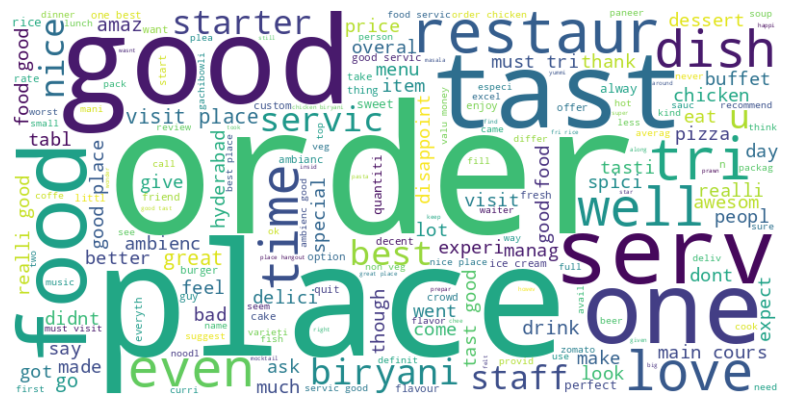

In [89]:
from wordcloud import WordCloud
combined_text = " ".join(df['Review'].dropna())

# 워드클라우드 객체 생성
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 표시 제거
plt.show()

# 감성 분석

In [90]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,food goodw order kodi drumstick basket mutton ...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [91]:
# packages
from textblob import TextBlob

#리뷰를 감정 분석한 새로운 컬럼(review_sent)을 만든다(~8분)

sent_res = []
for i in range(0, len(df)):
    analysis = TextBlob(df.loc[i,'Review']) #리뷰의 감정을 분석한다
    if analysis.sentiment.polarity > 0:
        sent_res.append('positive')
    elif analysis.sentiment.polarity == 0:
        sent_res.append('neutral')
    else:
        sent_res.append('nagative')
df['review_sent'] = sent_res

In [92]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,review_sent
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0,positive
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,positive
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,positive
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,positive
4,Beyond Flavours,Dileep,food goodw order kodi drumstick basket mutton ...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,positive


In [93]:
df.review_sent.value_counts()

positive    7258
nagative    1717
neutral     1025
Name: review_sent, dtype: int64

In [114]:
# review_sent에 숫자 값을 할당
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df['review_sent_num'] = df['review_sent'].map(sentiment_mapping)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,review_sent,review_sent_num
0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0,positive,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,positive,2.0
2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,positive,2.0
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincereti go...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,positive,2.0
4,Beyond Flavours,Dileep,food goodw order kodi drumstick basket mutton ...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,positive,2.0


In [115]:
df.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [126]:
data = df.copy()

In [127]:
# review_sent 열에서 NaN 값을 처리
data = data.dropna(subset=['Rating','review_sent'])  # NaN 값을 가진 행 제거
data = data[data['Rating'] != 'Like']
data['Rating'] = data['Rating'].astype(float)
data.review_sent_num.fillna(0, inplace = True)

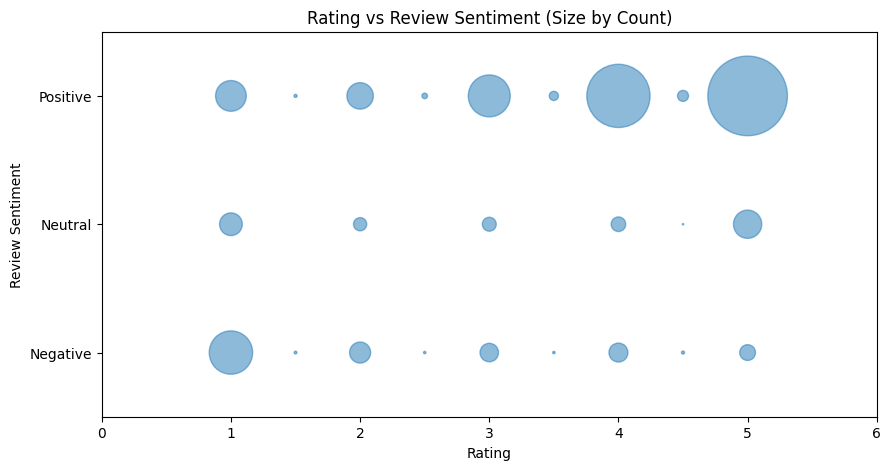

In [134]:
# 각 Rating과 review_sent 조합에 대한 카운트 계산
count_data = data.groupby(['Rating', 'review_sent_num']).size().reset_index(name='counts')

# 산점도 그리기 - 점의 크기를 카운트 값에 비례하게 설정
plt.figure(figsize=(10, 5))
plt.scatter(count_data['Rating'], count_data['review_sent_num'],
            s=count_data['counts'],  # 카운트에 비례하여 점의 크기를 설정
            alpha=0.5)

# x축과 y축 라벨 지정
plt.xlabel('Rating')
plt.ylabel('Review Sentiment')

# y축 눈금과 라벨 지정
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])

# 그래프 타이틀 설정
plt.title('Rating vs Review Sentiment (Size by Count)')

# x축 범위
plt.xlim(0, 6)

# y축 범위
plt.ylim(-0.5, 2.5)

# 그래프 보이기
plt.show()

# 부록 - 글자 판독

In [42]:
# # 단어 분류기
# import re
# hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

# i = 0
# if df_all['text'][i].upper() != df_all['text'][i].lower():
#    print('English')

# elif hangul.sub('', df_all['text'][i].replace(" ", "")) != "":
#      print('한글')

# else :
#      print('일본어')